In [1]:
## Load packages and check versions
import pandas as pd
import numpy as np
import sklearn.model_selection as ms
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## Download the excel file from the next site
# https://www.brentozar.com/archive/2024/01/announcing-the-2024-data-professional-salary-survey-results/

In [2]:
## Load Data
df = pd.read_excel('./Data_Professional_Salary_Survey_ResponsesTest.xlsx')

## Show the first five lines
df.head()

,Survey Year,Timestamp,SalaryUSD,Country,PostalCode,PrimaryDatabase,YearsWithThisDatabase,OtherDatabases,EmploymentStatus,JobTitle,...,NewestVersionInProduction,OldestVersionInProduction,PopulationOfLargestCityWithin20Miles,EmploymentSector,LookingForAnotherJob,CareerPlansThisYear,Gender,OtherJobDuties,KindsOfTasksPerformed,Counter
0,2024,2024-01-04 03:27:56.694,248000.0,United States,53593,Microsoft SQL Server,10,"Microsoft SQL Server, Oracle, Azure SQL DB (an...",Full time employee,"Developer: App code (C#, JS, etc)",...,Not Asked,Not Asked,100K-299K (city),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked,1
1,2024,2024-01-03 16:37:44.083,175000.0,Germany,NaN,Microsoft SQL Server,20,"SQLite, Azure SQL DB (any flavor)",Full time employee,Manager,...,Not Asked,Not Asked,1M+ (metropolis),Private business,Not Asked,"Stay with the same employer, but change roles",Male,Not Asked,Not Asked,1
2,2024,2024-01-03 13:55:38.746,131000.0,United Kingdom,NaN,Microsoft SQL Server,17,MongoDB,Full time employee,DBA (General - splits time evenly between writ...,...,Not Asked,Not Asked,300K-1M (large city),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked,1
3,2024,2024-01-03 12:54:15.524,129000.0,United Kingdom,WC2E 9ES,Microsoft SQL Server,12,"MySQL/MariaDB, PostgreSQL, Cassandra, Amazon R...",Full time employee,DBA (General - splits time evenly between writ...,...,Not Asked,Not Asked,1M+ (metropolis),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked,1
4,2024,2024-01-03 04:39:15.265,120000.0,United States,33179,Microsoft SQL Server,6,"Microsoft SQL Server, PostgreSQL, Microsoft Ac...",Full time employee,Manager,...,Not Asked,Not Asked,300K-1M (large city),Private business,Not Asked,"Stay with the same employer, same role",Prefer not to say,Not Asked,Not Asked,1


In [3]:
## This method examine all the column names
df.columns

Index(['Survey Year', 'Timestamp', 'SalaryUSD', 'Country', 'PostalCode',
       'PrimaryDatabase', 'YearsWithThisDatabase', 'OtherDatabases',
       'EmploymentStatus', 'JobTitle', 'ManageStaff', 'YearsWithThisTypeOfJob',
       'HowManyCompanies', 'OtherPeopleOnYourTeam', 'CompanyEmployeesOverall',
       'DatabaseServers', 'Education', 'EducationIsComputerRelated',
       'Certifications', 'HoursWorkedPerWeek', 'TelecommuteDaysPerWeek',
       'NewestVersionInProduction', 'OldestVersionInProduction',
       'PopulationOfLargestCityWithin20Miles', 'EmploymentSector',
       'LookingForAnotherJob', 'CareerPlansThisYear', 'Gender',
       'OtherJobDuties', 'KindsOfTasksPerformed', 'Counter'],
      dtype='object')

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12979 entries, 0 to 12978
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Survey Year                           12979 non-null  int64         
 1   Timestamp                             12979 non-null  datetime64[ns]
 2   SalaryUSD                             12979 non-null  float64       
 3   Country                               12979 non-null  object        
 4   PostalCode                            10455 non-null  object        
 5   PrimaryDatabase                       12979 non-null  object        
 6   YearsWithThisDatabase                 12979 non-null  int64         
 7   OtherDatabases                        10599 non-null  object        
 8   EmploymentStatus                      12979 non-null  object        
 9   JobTitle                              12979 non-null  object        
 10

In [ ]:
## Use dropna method removes the rows that contains NULL values
df_atual=df.dropna()

In [78]:
## Calculate percentage
df_atual.Country.value_counts(normalize=True)

United States     0.733043
United Kingdom    0.074351
Canada            0.034253
Australia         0.020389
India             0.016855
                    ...   
Jersey            0.000136
Bangladesh        0.000136
Uruguay           0.000136
Iran              0.000136
Albania           0.000136
Name: Country, Length: 77, dtype: float64

In [95]:
country=df_atual.Country
country

0         United States
3        United Kingdom
4         United States
8         United States
9                Turkey
              ...      
12970    United Kingdom
12971       Netherlands
12974            France
12976           Germany
12978     United States
Name: Country, Length: 7357, dtype: object

In [90]:
cant_country=country.value_counts()
cant_country

United States     5393
United Kingdom     547
Canada             252
Australia          150
India              124
                  ... 
Jersey               1
Bangladesh           1
Uruguay              1
Iran                 1
Albania              1
Name: Country, Length: 77, dtype: int64

In [99]:
percent_country=country.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
percent_country

United States     73.3%
United Kingdom     7.4%
Canada             3.4%
Australia          2.0%
India              1.7%
                  ...  
Jersey             0.0%
Bangladesh         0.0%
Uruguay            0.0%
Iran               0.0%
Albania            0.0%
Name: Country, Length: 77, dtype: object

In [109]:
## Calculate mean
salary=df_atual['SalaryUSD']
print("%.0f" % salary.mean() + " USD")

104369 USD


In [5]:

## Choose the columns YearWithThisDatabase and SalaryUSD
cols = ['YearsWithThisDatabase','SalaryUSD']
df_model = df_atual[cols]

## Use method astype in both 
df_model['YearsWithThisDatabase']=df_model['YearsWithThisDatabase'].astype(str).astype(int)
df_model['SalaryUSD']=df_model['SalaryUSD'].astype(str).astype(float)



C:\Users\55119\AppData\Local\Temp\ipykernel_7048\3855453156.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['YearsWithThisDatabase']=df_model['YearsWithThisDatabase'].astype(str).astype(int)
C:\Users\55119\AppData\Local\Temp\ipykernel_7048\3855453156.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['SalaryUSD']=df_model['SalaryUSD'].astype(str).astype(float)


In [6]:
## See again the dataframe that we work
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7357 entries, 0 to 12978
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YearsWithThisDatabase  7357 non-null   int32  
 1   SalaryUSD              7357 non-null   float64
dtypes: float64(1), int32(1)
memory usage: 143.7 KB


In [7]:
## Select and define the variable depent and indepent 
## Remember de equation y = mx+ b

# YearsWithThisDatabase
X=df_model.iloc[:, :-1]

# SalaryUSD
y=df_model.iloc[:, -1]


In [8]:
# Choice data for training
X_train, X_test, y_train, y_test= ms.train_test_split(X, y,test_size=0.4, random_state=23)


In [9]:
X_train = np.array(X_train).reshape(-1,1)
X_train

array([[21],
       [20],
       [10],
       ...,
       [10],
       [12],
       [15]])

In [10]:
X_test = np.array(X_test).reshape(-1,1)
X_test

array([[18],
       [10],
       [ 6],
       ...,
       [20],
       [ 3],
       [14]])

In [11]:
#Train the model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [12]:
## Prediction
y_pred = lm.predict(X_train)
y_pred

array([103350.33210314, 103332.95466784, 103159.18031478, ...,
       103159.18031478, 103193.93518539, 103246.06749131])

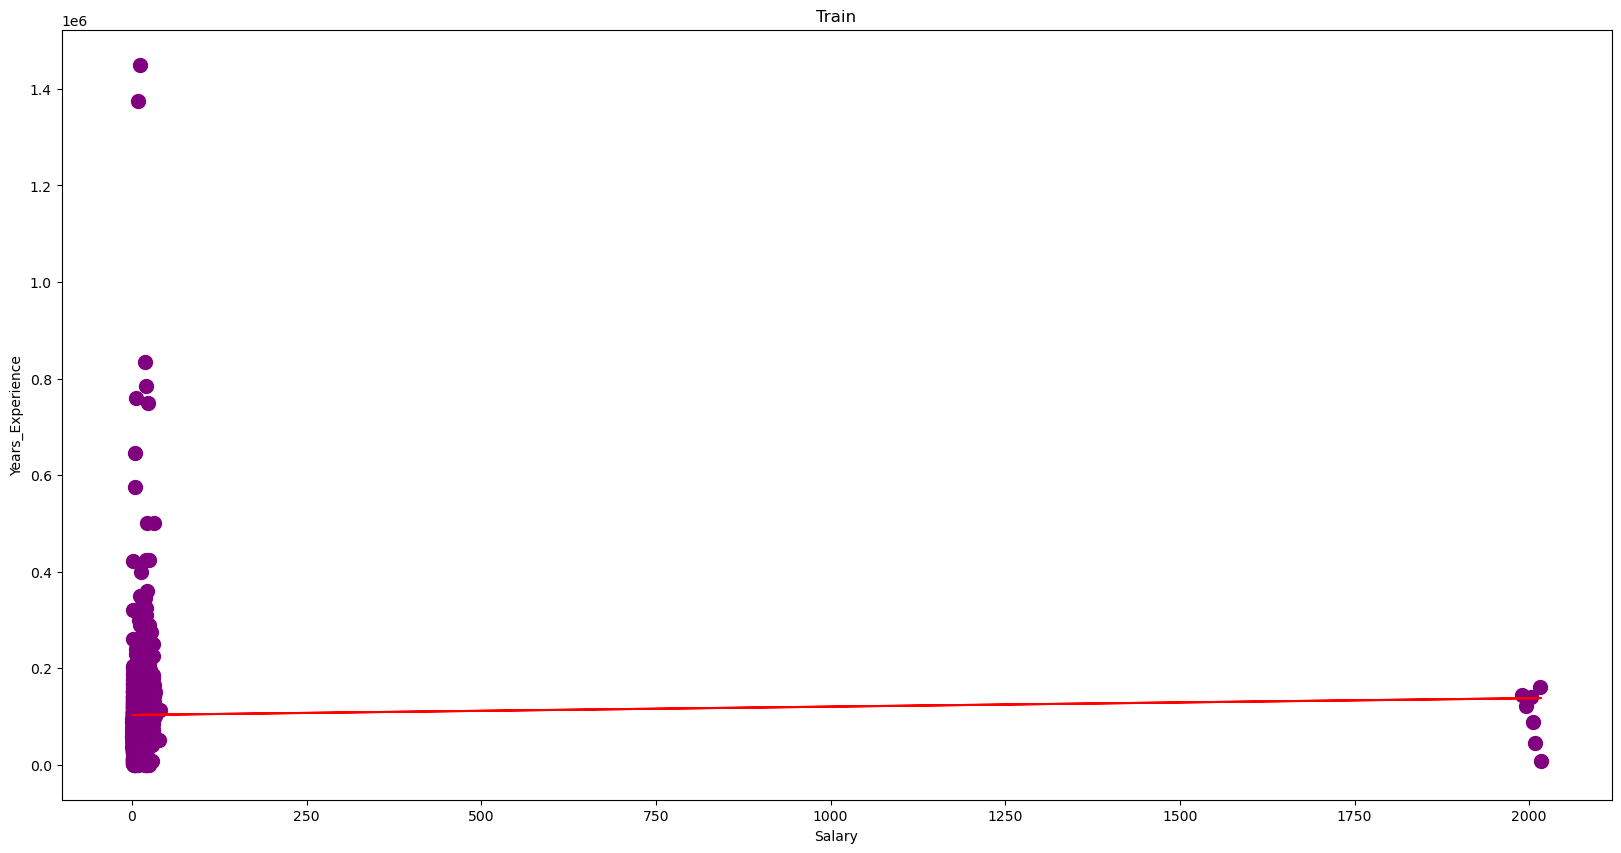

In [110]:
## Visualization the train
plt.figure(figsize=(20,10))
plt.scatter(X_train, y_train, color = 'purple', s=100)
plt.plot(X_train, lm.predict(X_train), color = 'red')#, scaley=False)
plt.xlabel("Salary")
plt.ylabel("Years_Experience")
plt.title('Train')
plt.show()

In [14]:
## Prediction test
y_pred_test = lm.predict(X_test)
y_pred_test

array([103298.19979723, 103159.18031478, 103089.67057355, ...,
       103332.95466784, 103037.53826764, 103228.690056  ])

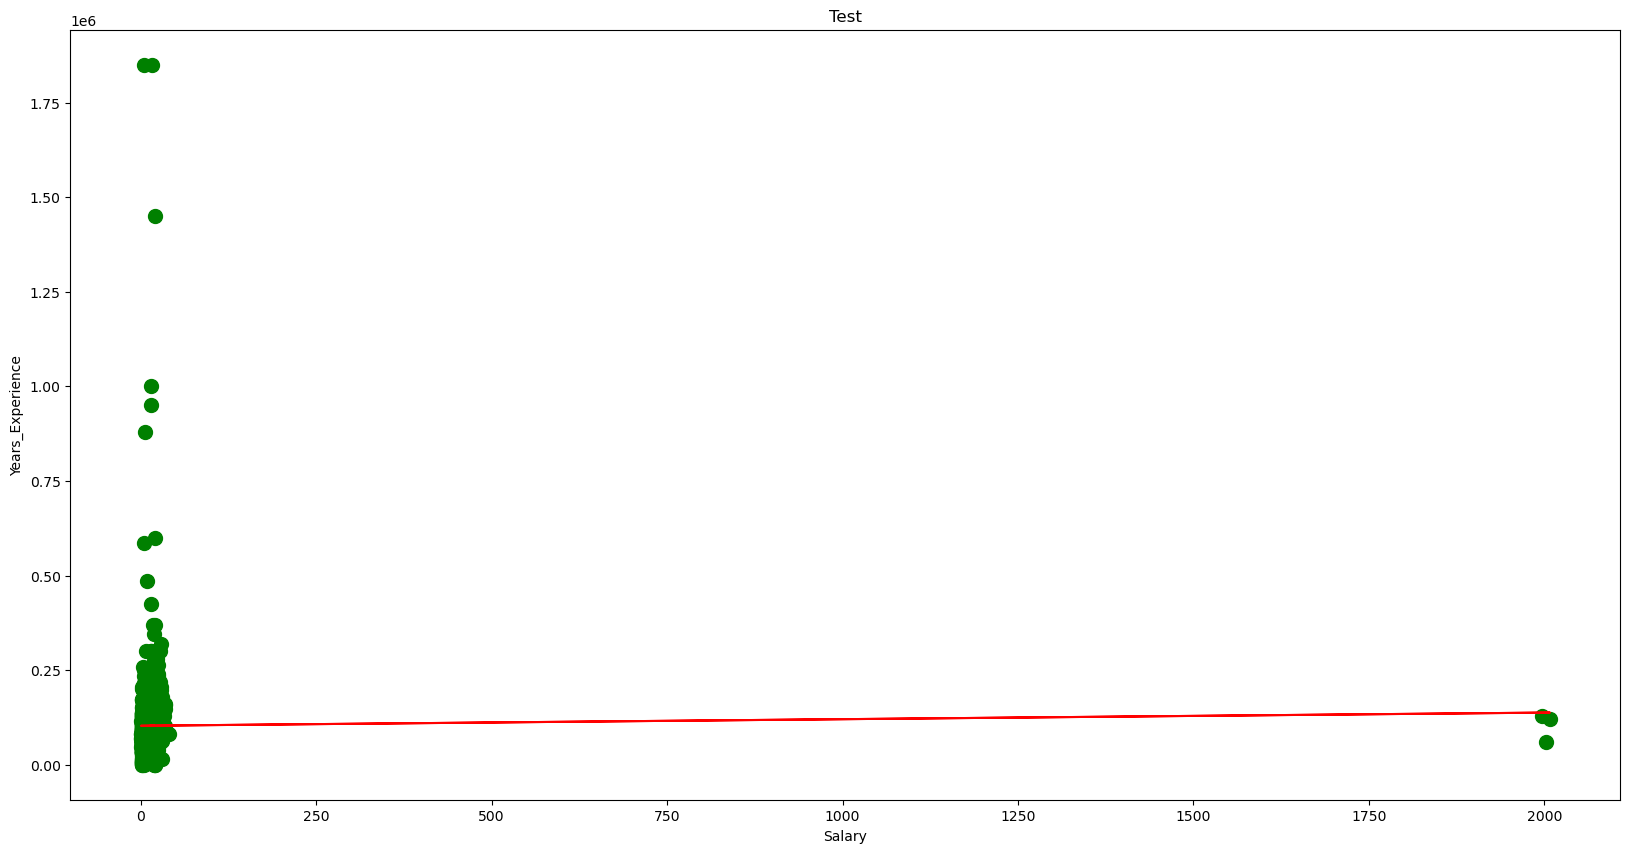

In [35]:
## Visualization the teste
plt.figure(figsize=(20,10))
plt.scatter(X_test, y_test, color = 'green', s=100)
plt.plot(X_test, y_pred_test, color = 'red', scaley=False)
plt.xlabel("Salary")
plt.ylabel("Years_Experience")
plt.title('Test')
plt.show()


In [17]:
## Values specific
print("%.2f" % lm.predict([[10]]))

103159.18
